In [9]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)


In [10]:
np.random.seed(1024)

In [28]:
nsample = 50
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, (x)**2))
X = sm.add_constant(X)
beta = [5., 0.5, 0.02]
sig = 0.5
w=np.ones(len(x))
w[25:]=8
#w=np.linspace(1,10,len(x))
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + sig * w * e
#X = X[:,[0,1]]

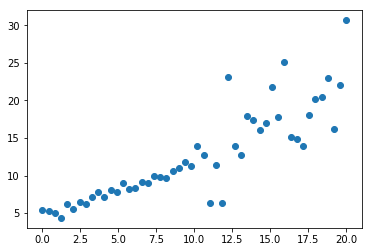

In [29]:
plt.scatter(x,y)

In [30]:
mod_wls = sm.WLS(y, X, weights=1./(w** 2))#weighted Least Squares 
res_wls = mod_wls.fit()#Ajustar
print(res_wls.summary())#Resumen

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            WLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     263.8
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           2.81e-26
Time:                        12:21:57   Log-Likelihood:                -87.854
No. Observations:                  50   AIC:                             181.7
Df Residuals:                      47   BIC:                             187.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9235      0.241     20.396      0.0

In [31]:
model = sm.OLS(y, X)#Ordinary Least Squares
results = model.fit()#Ajustar
print(results.summary())#Resumen

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     78.09
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           1.15e-15
Time:                        12:21:57   Log-Likelihood:                -124.93
No. Observations:                  50   AIC:                             255.9
Df Residuals:                      47   BIC:                             261.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0629      1.238      4.089      0.0

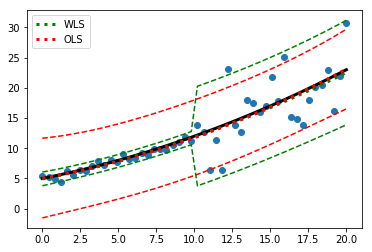

In [32]:
plt.scatter(x,y)
plt.plot(x,y_true,c='k',lw=3)#lw=linewidth
plt.plot(x, res_wls.fittedvalues, 'g:', label="WLS",lw=3)#'g--.': g+green (:punteada,-solida,-.raya-punto,--discontinua)
plt.plot(x, results.fittedvalues, 'r:', label="OLS",lw=3)
prstd, iv_l, iv_u = wls_prediction_std(results)#intervalo de confianza para el OLS
plt.plot(x, iv_u, 'r--')
plt.plot(x, iv_l, 'r--')

prstd, iv_l, iv_u = wls_prediction_std(res_wls)
plt.plot(x, iv_u, 'g--')
plt.plot(x, iv_l, 'g--')
plt.legend()